# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic
# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [142]:
my_series = pd.Series([213, 234, 234, 5, 123, 57])
my_series.values

array([213, 234, 234,   5, 123,  57])

In [143]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [144]:
# Ваш код здесь
cases, signs = data.shape

ic(cases)
ic(signs)

ic| cases: 32561
ic| signs: 15


15

**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [145]:
print('\n'.join(data.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [146]:
# Ваш код здесь

tmp_data = data.copy()
print('cases num before:', tmp_data.shape[0])
a = []
for i in range(tmp_data.shape[0]):
    tmp_data.loc[i] = tmp_data.loc[i].values == '?'
    if tmp_data.loc[i].any():
        a.append(i)
data = data.drop(tmp_data.index[a])
print('cases num after:', data.shape[0])

cases num before: 32561
cases num after: 30162


**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [147]:
tmp_data = data.copy()
tmp_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [148]:
# Уменельшение размеров памяти целых чисел
tmp_data['age'] = tmp_data['age'].astype('int32')
for x in tmp_data:
    if str(tmp_data[x].dtype) == 'object':
        tmp_data[x] = tmp_data[x].astype('category')
tmp_data.dtypes

age                  int32
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
salary            category
dtype: object

**Для категориальных признаков выведите список категорий**

In [149]:
# Ваш код здесь
for x in tmp_data:
    if str(tmp_data[x].dtype) == 'category':
        print(f'{x}:')
        print('  ' + '\n  '.join(list(tmp_data[x].unique())), end='\n\n')

workclass:
  State-gov
  Self-emp-not-inc
  Private
  Federal-gov
  Local-gov
  Self-emp-inc
  Without-pay

education:
  Bachelors
  HS-grad
  11th
  Masters
  9th
  Some-college
  Assoc-acdm
  7th-8th
  Doctorate
  Assoc-voc
  Prof-school
  5th-6th
  10th
  Preschool
  12th
  1st-4th

marital-status:
  Never-married
  Married-civ-spouse
  Divorced
  Married-spouse-absent
  Separated
  Married-AF-spouse
  Widowed

occupation:
  Adm-clerical
  Exec-managerial
  Handlers-cleaners
  Prof-specialty
  Other-service
  Sales
  Transport-moving
  Farming-fishing
  Machine-op-inspct
  Tech-support
  Craft-repair
  Protective-serv
  Armed-Forces
  Priv-house-serv

relationship:
  Not-in-family
  Husband
  Wife
  Own-child
  Unmarried
  Other-relative

race:
  White
  Black
  Asian-Pac-Islander
  Amer-Indian-Eskimo
  Other

sex:
  Male
  Female

native-country:
  United-States
  Cuba
  Jamaica
  India
  Mexico
  Puerto-Rico
  Honduras
  England
  Canada
  Germany
  Iran
  Philippines
  Poland
  C

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [150]:
# Ваш код здесь
tmp_data = data.copy()
men_num = tmp_data.loc[tmp_data['sex'] == 'Male']['sex'].count()
print("Men:", men_num)
print("Women:", tmp_data.shape[0] - men_num)

Men: 20380
Women: 9782


**2. Каков средний возраст (признак *age*) женщин?**

In [151]:
# Ваш код здесь
tmp_data = data.copy()
tmp_data = tmp_data.loc[tmp_data['sex'] == 'Female']
print('average female age:', tmp_data['age'].sum() / tmp_data.shape[0])

average female age: 36.8834594152525


**3. Какова доля граждан Германии (признак *native-country*)?**

In [152]:
# Ваш код здесь Germany
tmp_data = data.copy()
all_people = tmp_data.shape[0]
germans = tmp_data.loc[tmp_data['native-country'] == 'Germany']['age'].count()
print(f'{(germans * 100 / all_people):.2f}%', end=' ')
print(f'({germans}/{all_people})')

0.42% (128/30162)


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

<AxesSubplot:xlabel='education', ylabel='count'>

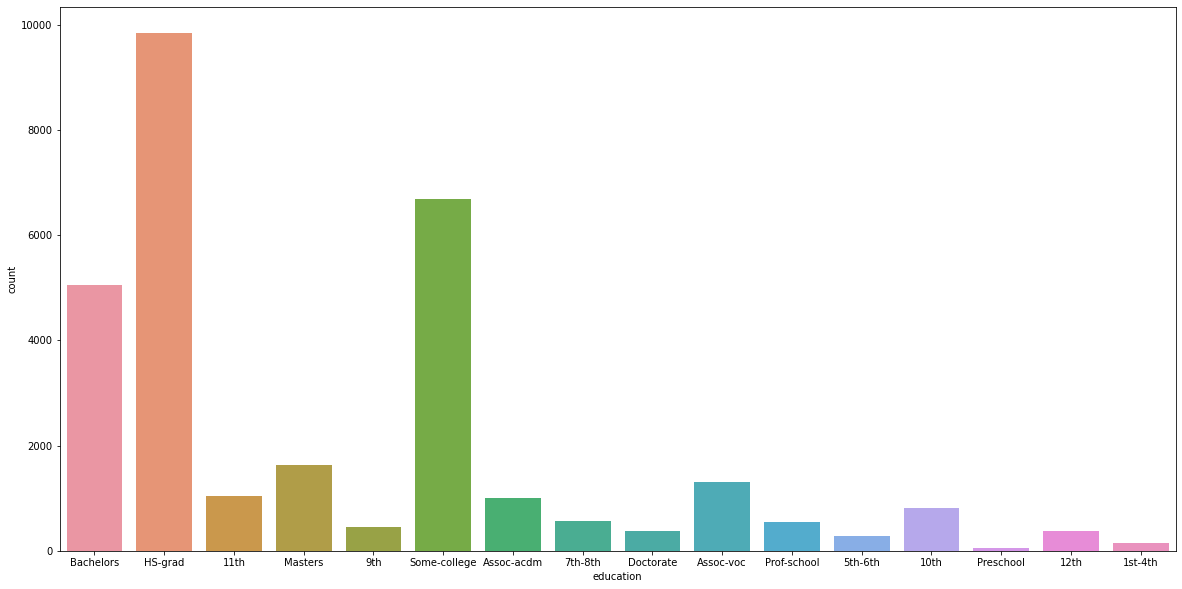

In [153]:
# Ваш код здесь
plt.figure(figsize=(20, 10))
sns.countplot(x='education', data=data)

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [154]:
# Ваш код здесь
tmp_data = data.copy().groupby('salary')['age'].agg([np.mean, np.var])
tmp_data.head()

,mean,var
salary,,
<=50K,36.60806,181.296295
>50K,43.95911,105.465359


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [155]:
# Ваш код здесь
tmp_data = data.copy()
td1 = tmp_data.loc[tmp_data['salary'] == '>50K']
td2 = td1.loc[td1['education'].isin(('Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'))]
# print(td1.shape[0], td2.shape[0])
print(td1.shape[0] == td2.shape[0])

False


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [156]:
# Ваш код здесь
tmp_data = data.copy()
ra_data = tmp_data.groupby(['race', 'sex'])
ra_data.describe()
# Продолжение этого задания ниже

age                                           \
                             count       mean        std   min    25%   50%   
race               sex                                                        
Amer-Indian-Eskimo Female    107.0  37.252336  12.933862  17.0  28.00  37.0   
                   Male      179.0  36.430168  10.802589  17.0  28.00  35.0   
Asian-Pac-Islander Female    294.0  35.363946  11.819758  17.0  25.25  34.0   
                   Male      601.0  39.156406  12.772451  18.0  29.00  37.0   
Black              Female   1399.0  38.042888  12.320976  17.0  28.00  37.0   
                   Male     1418.0  37.681241  12.516296  17.0  28.00  36.0   
Other              Female     87.0  31.908046  10.216986  17.0  24.00  29.0   
                   Male      144.0  34.625000  11.280204  17.0  26.00  32.0   
White              Female   7895.0  36.784421  13.814467  17.0  25.00  35.0   
                   Male    18038.0  39.366781  12.918661  17.0  29.00  38.0   

                                        fnlwgt                 ...  \
                            75%   max    count           mean  ...   
race               sex                                         ...   
Amer-Indian-Eskimo Female  46.0  80.0    107.0  114351.317757  ...   
                   Male    44.0  71.0    179.0  128955.893855  ...   
Asian-Pac-Islander Female  44.0  75.0    294.0  149141.653061  ...   
                   Male    47.0  90.0    601.0  164325.003328  ...   
Black              Female  46.0  90.0   1399.0  213195.729807  ...   
                   Male    46.0  90.0   1418.0  244209.997179  ...   
Other              Female  39.5  58.0     87.0  169234.091954  ...   
                   Male    42.0  77.0    144.0  211805.701389  ...   
White              Female  46.0  90.0   7895.0  183617.754908  ...   
                   Male    48.0  90.0  18038.0  188890.108992  ...   

                          capital-loss         hours-per-week             \
                                   75%     max          count       mean   
race               sex                                                     
Amer-Indian-Eskimo Female          0.0  1721.0          107.0  37.018692   
                   Male            0.0  1980.0          179.0  42.463687   
Asian-Pac-Islander Female          0.0  2258.0          294.0  37.857143   
                   Male            0.0  2457.0          601.0  41.793677   
Black              Female          0.0  3004.0         1399.0  37.015011   
                   Male            0.0  2559.0         1418.0  40.311707   
Other              Female          0.0  1590.0           87.0  36.827586   
                   Male            0.0  2179.0          144.0  42.097222   
White              Female          0.0  4356.0         7895.0  36.883091   
                   Male            0.0  3770.0        18038.0  43.095354   

                                                                    
                                 std   min   25%   50%   75%   max  
race               sex                                              
Amer-Indian-Eskimo Female  10.867106   4.0  35.0  40.0  40.0  84.0  
                   Male    11.333681   8.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  10.864665   2.0  35.0  40.0  40.0  80.0  
                   Male    11.945879   1.0  40.0  40.0  45.0  99.0  
Black              Female   9.394345   2.0  35.0  40.0  40.0  99.0  
                   Male    10.751909   1.0  40.0  40.0  40.0  99.0  
Other              Female   9.821911   6.0  32.0  40.0  40.0  65.0  
                   Male    11.163326  12.0  40.0  40.0  40.0  98.0  
White              Female  11.797662   1.0  32.0  40.0  40.0  99.0  
                   Male    11.815988   1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

In [157]:

ra_data.describe()['age', 'max']['Amer-Indian-Eskimo']

sex
Female    80.0
Male      71.0
Name: (age, max), dtype: float64

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [158]:
# Ваш код здесь
tmp_data = data.copy()
people_num = tmp_data.shape[0]
tmp_data = tmp_data.loc[(tmp_data['sex'] == 'Male') & (tmp_data['salary'] == '>50K')]
cool_men_num = tmp_data.shape[0]
tmp_data = tmp_data.loc[tmp_data['marital-status'].
                      isin(['Married-civ-spouse', 
                            'Married-spouse-absent',
                            'Married-AF-spouse'])]
sm_num = tmp_data.shape[0]
sl_num = cool_men_num - sm_num
answer = sm_num-sl_num
if answer > 0:
    print('Married men is more often get big salary', f'({answer})')
elif answer < 0:
    print('Not married men is more often get big salary', f'({-answer})')
else:
    print('They get a same salary')


Married men is more often get big salary (5050)


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [159]:
# Ваш код здесь
tmp_data = data.copy()
max_h = tmp_data['hours-per-week'].max()
tmp_data = tmp_data.loc[tmp_data['hours-per-week'] == max_h]
num = tmp_data.shape[0]
tmp_data = tmp_data.loc[tmp_data['salary'] == '>50K']
cnum = tmp_data.shape[0]
print('max hours:', max_h)
print(f'percent: {cnum * 100 / num:.2f}%')

max hours: 99
percent: 32.05%


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

In [160]:
# Ваш код здесь
tmp_data = data.copy().groupby(['native-country', 'salary']).describe()
tmp_data = tmp_data['hours-per-week', 'mean']
for pair in tmp_data.keys():
    print(f'country: {pair[0]}, salary: {pair[1]}')
    print(f'average running time: {tmp_data[pair]}', end='\n\n')
# График ниже

country: Cambodia, salary: <=50K
average running time: 41.54545454545455

country: Cambodia, salary: >50K
average running time: 40.0

country: Canada, salary: <=50K
average running time: 38.70422535211268

country: Canada, salary: >50K
average running time: 46.94444444444444

country: China, salary: <=50K
average running time: 38.541666666666664

country: China, salary: >50K
average running time: 38.9

country: Columbia, salary: <=50K
average running time: 39.25925925925926

country: Columbia, salary: >50K
average running time: 50.0

country: Cuba, salary: <=50K
average running time: 38.71641791044776

country: Cuba, salary: >50K
average running time: 42.44

country: Dominican-Republic, salary: <=50K
average running time: 42.13846153846154

country: Dominican-Republic, salary: >50K
average running time: 47.0

country: Ecuador, salary: <=50K
average running time: 38.73913043478261

country: Ecuador, salary: >50K
average running time: 48.75

country: El-Salvador, salary: <=50K
average ru

<AxesSubplot:xlabel='native-country', ylabel='hours-per-week'>

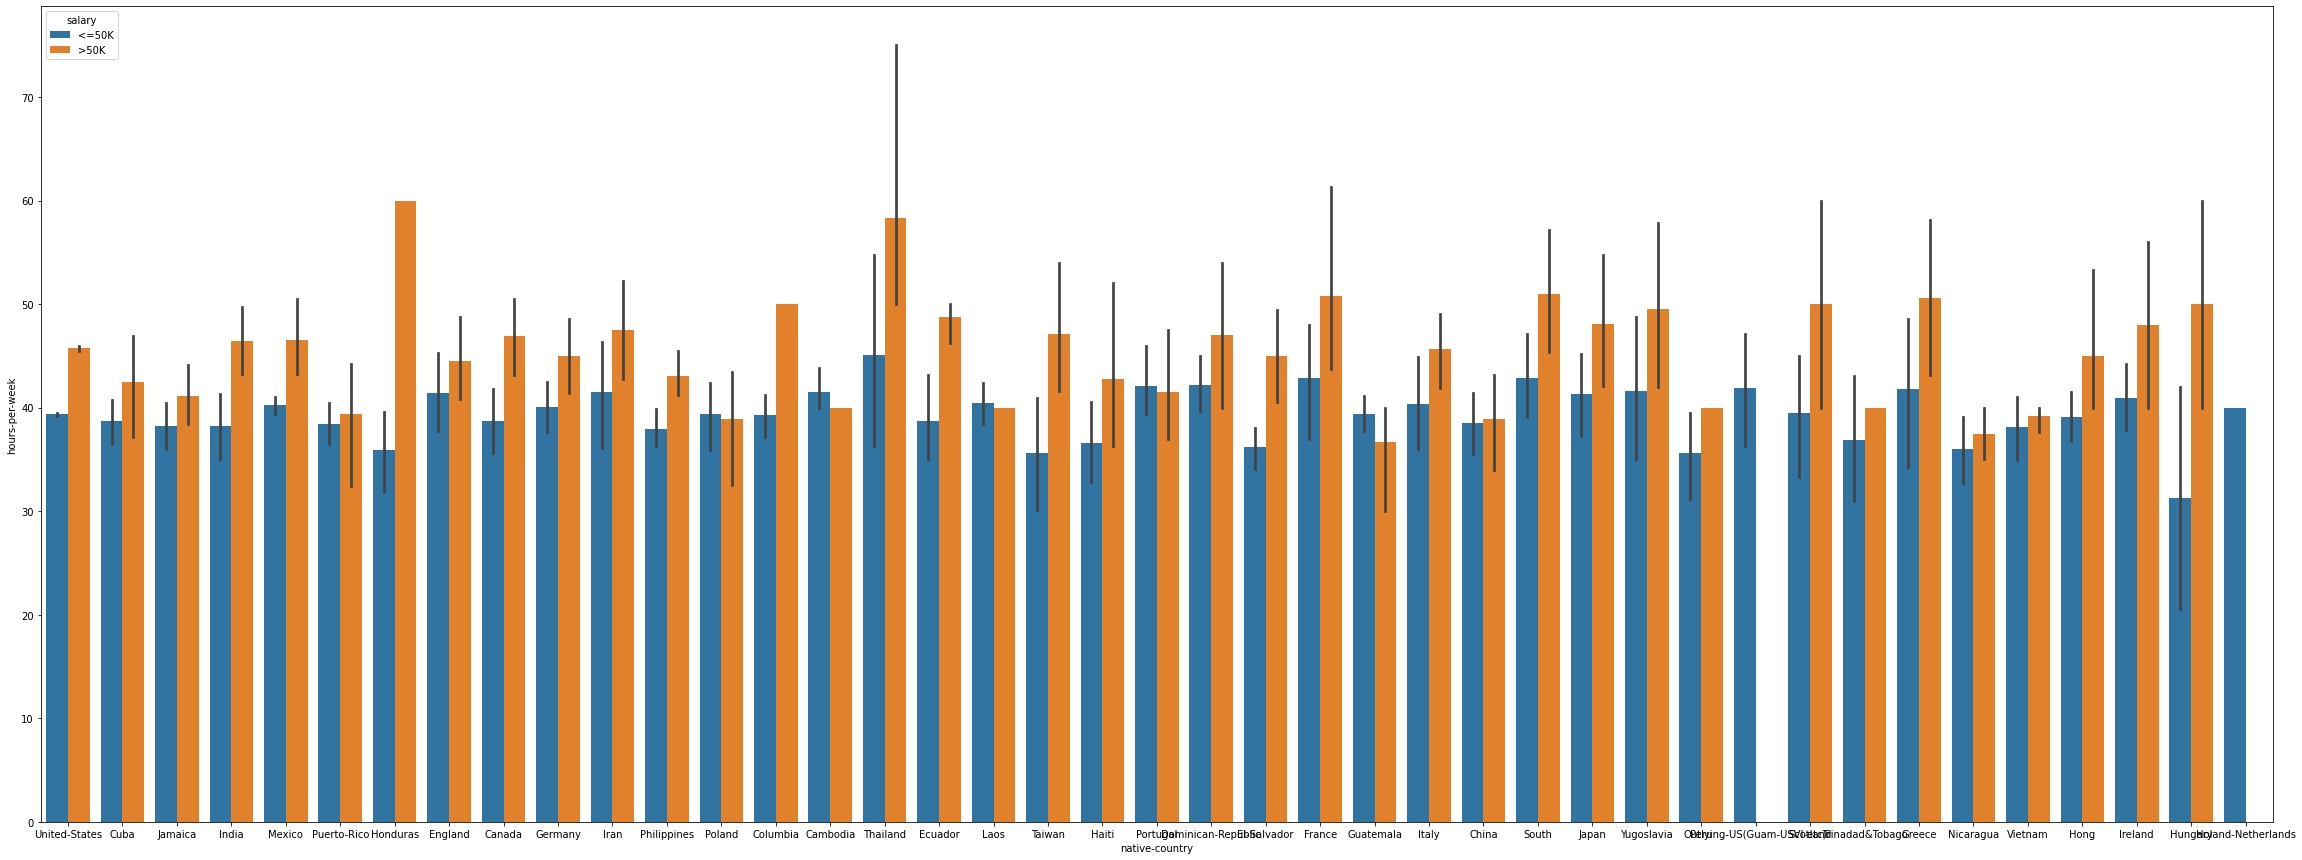

In [161]:
plt.figure(figsize=(40, 15))
sns.barplot(x='native-country', y='hours-per-week', hue='salary', data=data)